# Prepare data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

import gc

## load data

In [4]:
games = pd.read_csv('../data/games.csv')
games_details = pd.read_csv('../data/games_details.csv')
players = pd.read_csv('../data/players.csv')
teams = pd.read_csv('../data/teams.csv')
ranking = pd.read_csv('../data/ranking.csv')

/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_80894/894178139.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv('../data/games_details.csv')


In [5]:
gc.collect()

0

## Quick look

In [6]:
games.sample(5)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
14396,2008-12-02,20800261,Final,1610612743,1610612761,2008,1610612743,132.0,0.598,0.724,...,37.0,46.0,1610612761,93.0,0.366,0.870,0.294,21.0,39.0,1
16506,2007-03-16,20600971,Final,1610612755,1610612762,2006,1610612755,89.0,0.444,0.773,...,17.0,43.0,1610612762,88.0,0.481,0.643,0.357,30.0,38.0,1
11434,2010-12-15,21000375,Final,1610612759,1610612749,2010,1610612759,92.0,0.522,0.680,...,24.0,39.0,1610612749,90.0,0.443,0.875,0.545,17.0,40.0,1
27940,2015-03-28,21401091,Final,1610612757,1610612743,2014,1610612757,120.0,0.565,0.889,...,29.0,45.0,1610612743,114.0,0.467,0.864,0.375,24.0,39.0,1
7121,2014-02-07,21300747,Final,1610612740,1610612750,2013,1610612740,98.0,0.481,0.750,...,20.0,38.0,1610612750,91.0,0.373,0.838,0.222,14.0,44.0,1


In [7]:
games_details.sample(5)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
524503,21700966,1610612761,TOR,Toronto,1627832,Fred VanVleet,NaN,NaN,NaN,24:55,...,3.0,2.0,5.0,2.0,1.0,1.0,2.0,2.0,6.0,-14.0
636055,21400907,1610612749,MIL,Milwaukee,203487,Michael Carter-Williams,NaN,G,NaN,30:27,...,2.0,2.0,4.0,7.0,2.0,0.0,5.0,1.0,16.0,4.0
363919,20300390,1610612752,NYK,New York,1000,Shandon Anderson,NaN,NaN,NaN,19:05,...,3.0,2.0,5.0,1.0,0.0,0.0,1.0,3.0,8.0,-4.0
672739,21300930,1610612766,CHA,Charlotte,201229,Anthony Tolliver,NaN,NaN,NaN,22:25,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,10.0,-8.0
426243,21000305,1610612741,CHI,Chicago,200758,Ronnie Brewer,NaN,NaN,NaN,15:28,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,6.0,5.0


In [8]:
players.sample(5)

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
4501,Kevin Martin,1610612750,2755,2013
1720,Nik Stauskas,1610612751,203917,2017
2570,Tyler Ennis,1610612745,203898,2016
2535,Reggie Jackson,1610612765,202704,2016
1247,Robert Covington,1610612755,203496,2018


In [9]:
ranking

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612760,0,22024,2024-11-15,West,Oklahoma City,13,11,2,0.846,7-1,4-1,NaN
1,1610612744,0,22024,2024-11-15,West,Golden State,12,10,2,0.833,4-1,6-1,NaN
2,1610612745,0,22024,2024-11-15,West,Houston,13,9,4,0.692,6-2,3-2,NaN
3,1610612756,0,22024,2024-11-15,West,Phoenix,13,9,4,0.692,5-1,4-3,NaN
4,1610612747,0,22024,2024-11-15,West,L.A. Lakers,12,8,4,0.667,6-0,2-4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231157,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
231158,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
231159,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
231160,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


In [10]:
teams

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


### Season distribution

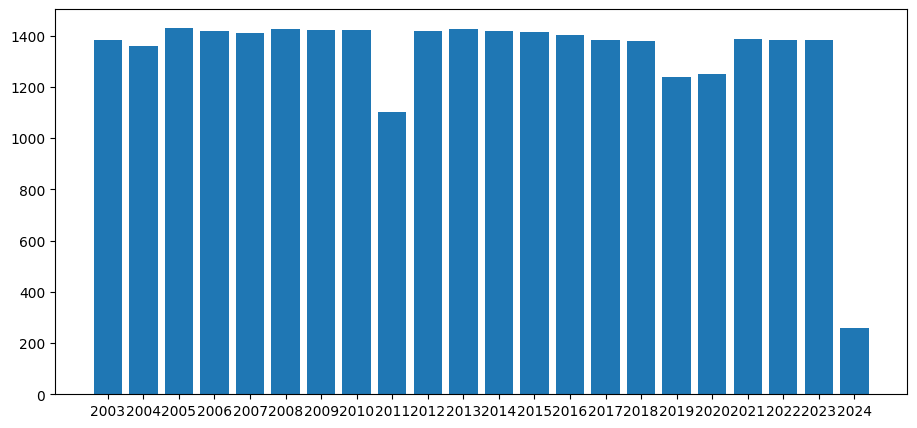

In [11]:
fig, ax = plt.subplots(figsize=(11,5))

v_c = games['SEASON'].value_counts().sort_index()
v_c.index = v_c.index.astype(str)
ax.bar(v_c.index, v_c.values)

plt.show()

The **2011–12 NBA** season was the 66th season of the National Basketball Association (NBA), which began with the signing of a new collective bargaining agreement (CBA) between the owners of the 30 NBA teams and the NBA's players. The previous CBA, which was ratified in 2005, expired at 12:01 AM EDT on July 1, 2011, resulting in a lockout. With the new deal in place, **the regular season was shortened** from the normal 82 games per team to 66, because of nearly two months of inactivity. 

Source : https://en.wikipedia.org/wiki/2011%E2%80%9312_NBA_season

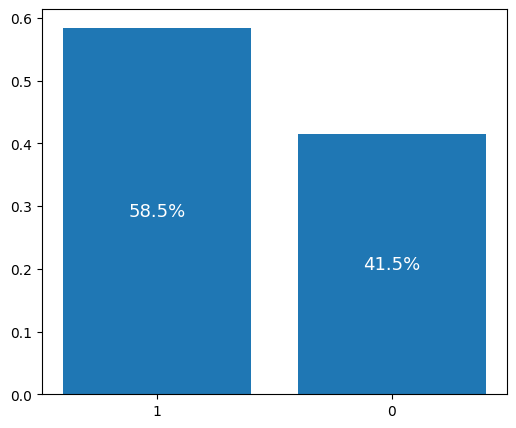

In [12]:
fig, ax = plt.subplots(figsize=(6,5))

v_c = games['HOME_TEAM_WINS'].value_counts(normalize=True)
v_c.index = v_c.index.astype(str)

ax.bar(v_c.index, v_c.values)

for i in ax.patches:
    x, y = i.get_x(), i.get_y()
    w, h = i.get_width(), i.get_height()

    val = str(round(h*100,1)) + '%' 

    ax.text(x + w/2, y + h/2, val,
            horizontalalignment='center', verticalalignment='center',
            fontsize=13, color='white')

plt.show()

A model that only says the winner in the home team will have a 59.1% to identify the winner.

## First preprocessing 

First we only need the 3 following datasets `games`, `games_details` and `ranking`.

Then at the end we'll want to get a row for a game. Since players can change we need to aggregate player stats and teams raking plus record.

So for each game we need to find out past games, and the same for each players

### Format rankings

In [13]:
def format_record(record):
    w = int(record[0])
    l = int(record[1])
    n = w+l
    
    if n == 0:
        return np.nan
    
    return w / n

def format_rankings(ranking):
    
    home_record = ranking.loc[:,'HOME_RECORD'].str.split('-').apply(format_record)
    road_record = ranking.loc[:,'ROAD_RECORD'].str.split('-').apply(format_record)
    
    ranking.loc[:,'HOME_RECORD'] = home_record
    ranking.loc[:,'ROAD_RECORD'] = road_record
    
    ranking.loc[:,'SEASON_ID'] = ranking.loc[:,'SEASON_ID'].astype(str).str[1:]
    
    return ranking



ranking = pd.read_csv('../data/ranking.csv')
ranking = format_rankings(ranking)

/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_80894/300487934.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['2024' '2024' '2024' ... '2013' '2013' '2013']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ranking.loc[:,'SEASON_ID'] = ranking.loc[:,'SEASON_ID'].astype(str).str[1:]


In [19]:
games.sample(5)[['GAME_DATE_EST','TEAM_ID_home','TEAM_ID_away','PTS_home','PTS_away','HOME_TEAM_WINS']]

,GAME_DATE_EST,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS
12988,2009-11-28,1610612739,1610612742,111.0,95.0,1
4858,2021-04-03,1610612759,1610612754,133.0,139.0,0
15662,2007-12-26,1610612737,1610612754,107.0,95.0,1
2796,2022-11-09,1610612750,1610612756,117.0,129.0,0
24820,2017-10-18,1610612756,1610612757,76.0,124.0,0


#### Extract ranking context from team_id and date

In [20]:
ranking = ranking.sort_values(by='STANDINGSDATE')

In [21]:
def get_team_ranking_before_date(team_id, date, min_games=10):
    """Returned a dataframe with the team id, 
    Number of games played, win percentage, home and road record for
    current and previous season.
    
    Current and previous season are based on the date    
    """
    
    _ranking = ranking.loc[ranking['STANDINGSDATE'] < date]
    _ranking = _ranking.loc[_ranking['TEAM_ID'] == team_id]
    
    if _ranking.tail(1)['G'].values[0] < min_games:
        _ranking = _ranking.loc[_ranking['SEASON_ID']  < _ranking['SEASON_ID'].max()]
    
    _prev_season = _ranking.loc[_ranking['SEASON_ID']  < _ranking['SEASON_ID'].max()]
    _prev_season = _prev_season.loc[_prev_season['STANDINGSDATE'] == _prev_season['STANDINGSDATE'].max()]
    
    _current_season = _ranking[_ranking['STANDINGSDATE'] == _ranking['STANDINGSDATE'].max()]
    
    _current_season = _current_season[['TEAM_ID','G','W_PCT','HOME_RECORD','ROAD_RECORD']]
    _prev_season = _prev_season[['TEAM_ID','W_PCT','HOME_RECORD','ROAD_RECORD']]
    
    return _current_season.merge(_prev_season, on='TEAM_ID', suffixes=('','_prev')).drop(columns='TEAM_ID')


def get_team_ranking_before_game(games):
    _games = games.copy()
    
    def _get_ranking(game):
        date = game['GAME_DATE_EST'].values[0]
        home_team = game['TEAM_ID_home'].values[0]
        away_team = game['TEAM_ID_away'].values[0]
        
        h_rank = get_team_ranking_before_date(home_team, date)
        a_rank = get_team_ranking_before_date(away_team, date)
        
        h_rank.columns += '_home'
        a_rank.columns += '_away'
        
        return pd.concat([h_rank, a_rank], axis=1)
    
        
    _games = _games.groupby('GAME_ID').apply(_get_ranking)
    _games = _games.reset_index().drop(columns='level_1')
    
    return _games.reset_index(drop=True)

In [22]:
%%time

_games = games.sample(10)
get_team_ranking_before_game(_games)

CPU times: user 335 ms, sys: 27.7 ms, total: 363 ms
Wall time: 365 ms


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_80894/3340459252.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  _games = _games.groupby('GAME_ID').apply(_get_ranking)


,GAME_ID,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,HOME_RECORD_away,ROAD_RECORD_away,W_PCT_prev_away,HOME_RECORD_prev_away,ROAD_RECORD_prev_away
0,20400465,30,0.567,0.666667,0.466667,0.305,0.414634,0.195122,30,0.767,0.785714,0.75,0.451,0.512195,0.390244
1,20600197,14,0.429,0.666667,0.25,0.256,0.365854,0.146341,12,0.500,0.714286,0.2,0.659,0.756098,0.560976
2,20800426,27,0.556,0.642857,0.461538,0.183,0.219512,0.146341,28,0.464,0.769231,0.2,0.402,0.487805,0.317073
3,20900217,14,0.786,1.0,0.666667,0.561,0.682927,0.439024,14,0.357,0.571429,0.142857,0.293,0.390244,0.195122
4,21200987,66,0.682,0.757576,0.606061,0.606,0.727273,0.484848,63,0.603,0.6875,0.516129,0.545,0.666667,0.424242
5,21400019,82,0.598,0.634146,0.560976,0.500,0.585366,0.414634,82,0.305,0.390244,0.219512,0.524,0.731707,0.317073
6,21500875,58,0.241,0.322581,0.148148,0.476,0.536585,0.414634,57,0.596,0.7,0.481481,0.671,0.756098,0.585366
7,21901286,68,0.721,0.705882,0.735294,0.707,0.780488,0.634146,70,0.471,0.542857,0.4,0.402,0.512195,0.292683
8,22200942,61,0.475,0.518519,0.441176,0.427,0.512195,0.341463,63,0.492,0.606061,0.366667,0.585,0.585366,0.585366
9,22300143,82,0.463,0.560976,0.365854,0.634,0.707317,0.560976,82,0.329,0.317073,0.341463,0.524,0.536585,0.512195


### Get game stats

In [23]:
games = games.sort_values(by='GAME_DATE_EST')

In [24]:
def get_games_stats_before_date(team_id, date, n, stats_cols, game_type='all'):
    """
    """
    
    if game_type not in ['all','home','away']:
        raise ValueError('game_type must be all, home or away')
    
    _games = games.loc[games['GAME_DATE_EST'] < date]
    _games = _games.loc[(_games['TEAM_ID_home'] == team_id) | (_games['TEAM_ID_away'] == team_id)]
    
    _games.loc[:,'is_home'] = _games['TEAM_ID_home'] == team_id
    
    if game_type == 'home':
        _games = _games.loc[_games['is_home']]
        
    elif game_type == 'away':
        _games = _games.loc[~_games['is_home']]
        
    _games.loc[:,'WIN_PRCT'] = _games['is_home'] == _games['HOME_TEAM_WINS']
    
    for col in stats_cols:
        _games.loc[:,col] = np.where(_games['is_home'], _games['%s_home'%col], _games['%s_away'%col])
    
    cols = ['WIN_PRCT'] + stats_cols
    
    if len(_games) < n:
        return _games[cols]
    
    return _games.tail(n)[cols]



STATS_COLUMNS = ['PTS','FG_PCT','FT_PCT','FG3_PCT','AST','REB']
# STATS_COLUMNS = ['PTS']

def get_games_stats_before_game(games, n, stats_cols=STATS_COLUMNS):
    _games = games.copy()
    
    def _get_stats(game):
        date = game['GAME_DATE_EST'].values[0]
        home_team = game['TEAM_ID_home'].values[0]
        away_team = game['TEAM_ID_away'].values[0]
        
        h_stats = get_games_stats_before_date(home_team, date, n, stats_cols, game_type='all')
        h_stats.columns += '_home_%ig'%n
        h_stats = h_stats.mean().to_frame().T
        
        a_stats = get_games_stats_before_date(away_team, date, n, stats_cols, game_type='all')
        a_stats.columns += '_away_%ig'%n
        a_stats = a_stats.mean().to_frame().T
        
        return pd.concat([h_stats, a_stats], axis=1)
        
        
    _games = _games.groupby('GAME_ID').apply(_get_stats)
    _games = _games.reset_index().drop(columns='level_1')
    
    return _games.reset_index(drop=True)

In [25]:
%%time

_games = games.sample(10, random_state=42)
get_games_stats_before_game(_games, n=2)

CPU times: user 85.8 ms, sys: 7.53 ms, total: 93.3 ms
Wall time: 94.4 ms


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_80894/1191657409.py:55: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  _games = _games.groupby('GAME_ID').apply(_get_stats)


,GAME_ID,WIN_PRCT_home_2g,PTS_home_2g,FG_PCT_home_2g,FT_PCT_home_2g,FG3_PCT_home_2g,AST_home_2g,REB_home_2g,WIN_PRCT_away_2g,PTS_away_2g,FG_PCT_away_2g,FT_PCT_away_2g,FG3_PCT_away_2g,AST_away_2g,REB_away_2g
0,11100011,1.0,108.5,0.5325,0.7225,0.5535,21.0,33.0,0.0,100.5,0.4470,0.8000,0.2335,19.5,52.0
1,11600001,0.0,82.5,0.4045,0.6825,0.2480,14.5,30.0,0.0,95.0,0.3940,0.7295,0.3755,20.5,37.0
2,12000047,0.0,111.0,0.4380,0.7920,0.3150,24.5,52.5,0.5,116.0,0.4660,0.8095,0.3860,32.5,40.5
3,20600607,0.5,102.5,0.4500,0.5950,0.3245,25.0,49.0,0.0,93.5,0.4625,0.7090,0.4115,19.5,41.0
4,20700437,0.0,98.0,0.4430,0.7090,0.3475,22.0,37.5,1.0,107.5,0.5135,0.7410,0.4335,28.0,36.5
5,20700541,1.0,104.0,0.5095,0.8575,0.3910,21.0,38.5,1.0,106.0,0.4835,0.8800,0.5045,27.0,47.0
6,20700732,0.5,95.0,0.4850,0.6920,0.3065,19.0,45.5,0.5,112.0,0.5500,0.8345,0.5000,22.5,34.5
7,20900399,0.5,92.0,0.4145,0.8055,0.3220,19.5,38.0,0.0,100.0,0.4600,0.7540,0.3865,18.0,36.5
8,21100765,0.5,87.0,0.3975,0.7730,0.3455,17.5,45.0,1.0,98.0,0.4600,0.8065,0.2170,22.5,37.5
9,21300142,0.5,118.5,0.5190,0.8370,0.3865,28.0,45.5,0.0,89.5,0.4170,0.7545,0.3610,16.0,39.5


#### Check function validity

In [26]:
one_game = games.sample(1, random_state=42)
one_game[['GAME_ID','GAME_DATE_EST','TEAM_ID_home','TEAM_ID_away','PTS_home','PTS_away','HOME_TEAM_WINS']]

,GAME_ID,GAME_DATE_EST,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS
5613,12000047,2020-12-19,1610612753,1610612766,120.0,117.0,1


- **GAME_ID** selected : 21201104
- **TEAM_ID_home** : 1610612750
- **TEAM_ID_away** : 1610612738

In [27]:
date = '2013-04-01'
game_id = 21201104
h_team = 1610612745
a_team = 1610612753

In [28]:
_games = games[games['GAME_DATE_EST'] < date].sort_values(by='GAME_DATE_EST')
    
for team_id in [h_team, a_team]:
    print(team_id)
    _games2 = _games.loc[(_games['TEAM_ID_home'] == team_id) | (_games['TEAM_ID_away'] == team_id)]

    # Check on PTS and AST
    _games2 = _games2[['GAME_DATE_EST','TEAM_ID_home','PTS_home','REB_home','TEAM_ID_away','PTS_away','REB_away']]

    # define n = 5
    display(_games2.tail(5))

1610612745


,GAME_DATE_EST,TEAM_ID_home,PTS_home,REB_home,TEAM_ID_away,PTS_away,REB_away
8255,2013-03-22,1610612745,116.0,54.0,1610612739,78.0,32.0
8236,2013-03-24,1610612745,96.0,44.0,1610612759,95.0,38.0
8218,2013-03-27,1610612745,91.0,42.0,1610612754,100.0,45.0
8202,2013-03-29,1610612763,103.0,42.0,1610612745,94.0,35.0
8190,2013-03-30,1610612745,98.0,48.0,1610612746,81.0,38.0


1610612753


,GAME_DATE_EST,TEAM_ID_home,PTS_home,REB_home,TEAM_ID_away,PTS_away,REB_away
8250,2013-03-22,1610612753,89.0,44.0,1610612760,97.0,49.0
8229,2013-03-25,1610612753,94.0,43.0,1610612748,108.0,44.0
8213,2013-03-27,1610612766,114.0,43.0,1610612753,108.0,34.0
8197,2013-03-29,1610612753,97.0,41.0,1610612764,92.0,55.0
8188,2013-03-30,1610612737,97.0,44.0,1610612753,88.0,53.0


In [29]:
res = get_games_stats_before_game(one_game, n=5, stats_cols=['PTS','REB'])
res

/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_80894/1191657409.py:55: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  _games = _games.groupby('GAME_ID').apply(_get_stats)


,GAME_ID,WIN_PRCT_home_5g,PTS_home_5g,REB_home_5g,WIN_PRCT_away_5g,PTS_away_5g,REB_away_5g
0,12000047,0.2,109.6,48.8,0.4,115.8,44.0


In [30]:
h_pts = 116 + 96 + 91 + 94 + 98
a_pts = 89 + 94 + 108 + 97 + 88

h_reb = 54 + 44 + 42 + 35 + 48
a_reb = 44 + 43 + 34 + 41 + 53

h_pts = h_pts / 5
h_reb = h_reb / 5

a_pts = a_pts / 5
a_reb = a_reb / 5

print(h_pts, h_reb, a_pts, a_reb)

assert h_pts == res['PTS_home_5g'].values[0]
assert h_reb == res['REB_home_5g'].values[0]
assert a_pts == res['PTS_away_5g'].values[0]
assert a_reb == res['REB_away_5g'].values[0]
print('Function ok!')

99.0 44.6 95.2 43.0


AssertionError: 

### Combine team ranking stats and game stats

In [31]:
%%time 

def prepare_games_data(games):
    # Get ranking stats before game
    rank_stats = get_team_ranking_before_game(games)
    
    # Get stats before game 3 previous games
    game_stats_3g = get_games_stats_before_game(games, n=3)
    
    # Get stats before game 10 previous games
    game_stats_10g = get_games_stats_before_game(games, n=10)
    
    formated_games = rank_stats.merge(game_stats_3g, on='GAME_ID')
    formated_games = formated_games.merge(game_stats_10g, on='GAME_ID')
    
    return formated_games
    
    
_games = games.sample(10, random_state=42)
prepare_games_data(_games)

CPU times: user 422 ms, sys: 42.8 ms, total: 465 ms
Wall time: 482 ms


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_80894/3340459252.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  _games = _games.groupby('GAME_ID').apply(_get_ranking)
/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_80894/1191657409.py:55: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  _games = _games.groupby('GAME_ID').apply(_get_stats)
/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000

,GAME_ID,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,...,FG3_PCT_home_10g,AST_home_10g,REB_home_10g,WIN_PRCT_away_10g,PTS_away_10g,FG_PCT_away_10g,FT_PCT_away_10g,FG3_PCT_away_10g,AST_away_10g,REB_away_10g
0,11100011,82,0.695,0.707317,0.682927,0.671,0.682927,0.658537,82,0.671,...,0.3697,18.3,37.7,0.4,101.9,0.4481,0.8250,0.2754,18.3,46.4
1,11600001,82,0.683,0.780488,0.585366,0.598,0.658537,0.536585,82,0.890,...,0.3094,15.2,38.1,0.6,102.3,0.4332,0.7412,0.3911,22.6,41.4
2,12000047,73,0.452,0.514286,0.394737,0.512,0.609756,0.414634,65,0.354,...,0.3611,23.2,45.1,0.4,108.6,0.4538,0.7907,0.3952,26.3,43.5
3,20600607,40,0.600,0.833333,0.409091,0.610,0.756098,0.463415,41,0.537,...,0.3144,19.6,43.3,0.5,94.4,0.4517,0.6938,0.3939,19.5,43.9
4,20700437,30,0.500,0.5,0.5,0.427,0.536585,0.317073,29,0.759,...,0.3899,25.9,40.2,0.9,98.4,0.4562,0.7826,0.3498,22.3,41.5
5,20700541,36,0.528,0.529412,0.526316,0.573,0.731707,0.414634,35,0.629,...,0.3393,20.3,39.9,0.9,101.3,0.4593,0.7974,0.4237,24.4,44.2
6,20700732,47,0.213,0.347826,0.083333,0.390,0.487805,0.292683,46,0.804,...,0.2982,20.2,43.4,0.7,105.4,0.4945,0.8010,0.4172,21.0,39.4
7,20900399,26,0.346,0.384615,0.307692,0.390,0.487805,0.292683,25,0.400,...,0.4044,21.5,40.4,0.4,96.2,0.4501,0.7460,0.3505,17.4,39.7
8,21100765,52,0.481,0.52,0.444444,0.207,0.292683,0.121951,50,0.560,...,0.3561,21.9,45.6,0.7,93.4,0.4697,0.8416,0.3284,25.6,35.9
9,21300142,10,0.600,0.8,0.4,0.378,0.487805,0.268293,10,0.400,...,0.3571,25.2,45.2,0.4,94.8,0.4580,0.7855,0.3127,18.2,40.0


## Format full dataset (min season 2007) 

In [32]:
_games = games[games['SEASON'] >= 2007]

In [33]:
_games['SEASON'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [34]:
%%time
games_formated = prepare_games_data(_games)

KeyboardInterrupt: 

In [385]:
games_formated = games_formated.merge(games[['GAME_ID','GAME_DATE_EST','SEASON','HOME_TEAM_WINS']], on='GAME_ID', how='left')
games_formated = games_formated.reset_index(drop=True)

In [377]:
# games_formated = games_formated.drop(columns=['GAME_DATE_EST_y','GAME_DATE_EST_x'])

In [386]:
games_formated.head()

,GAME_ID,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,...,REB_home_10g,WIN_PRCT_away_10g,PTS_away_10g,FG_PCT_away_10g,FT_PCT_away_10g,FG3_PCT_away_10g,AST_away_10g,REB_away_10g,SEASON,HOME_TEAM_WINS
0,10700001,82,0.293,0.292683,0.292683,0.402,0.512195,0.292683,82,0.573,...,37.5,0.4,94.2,0.4471,0.7917,0.3460,19.3,38.4,2007,1
1,10700005,82,0.488,0.609756,0.365854,0.439,0.634146,0.243902,82,0.366,...,41.7,0.3,96.8,0.4723,0.7376,0.2604,21.3,42.1,2007,0
2,10700006,82,0.646,0.634146,0.658537,0.780,0.902439,0.658537,82,0.537,...,39.1,0.2,88.2,0.4612,0.6901,0.3780,18.1,35.0,2007,1
3,10700007,82,0.610,0.731707,0.487805,0.610,0.756098,0.463415,82,0.500,...,41.2,0.2,89.3,0.4112,0.6934,0.3144,18.4,38.5,2007,0
4,10700008,82,0.341,0.439024,0.243902,0.488,0.609756,0.365854,82,0.598,...,36.7,0.6,92.4,0.4300,0.7320,0.3553,20.6,41.9,2007,1


In [387]:
games_formated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17922 entries, 0 to 17921
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GAME_ID                17922 non-null  int64  
 1   G_home                 17922 non-null  int64  
 2   W_PCT_home             17922 non-null  float64
 3   HOME_RECORD_home       17922 non-null  float64
 4   ROAD_RECORD_home       17922 non-null  float64
 5   W_PCT_prev_home        17922 non-null  float64
 6   HOME_RECORD_prev_home  17922 non-null  float64
 7   ROAD_RECORD_prev_home  17922 non-null  float64
 8   G_away                 17922 non-null  int64  
 9   W_PCT_away             17922 non-null  float64
 10  HOME_RECORD_away       17922 non-null  float64
 11  ROAD_RECORD_away       17922 non-null  float64
 12  W_PCT_prev_away        17922 non-null  float64
 13  HOME_RECORD_prev_away  17922 non-null  float64
 14  ROAD_RECORD_prev_away  17922 non-null  float64
 15  WI

In [403]:
games_formated.isna().sum().sum()

0

In [388]:
games_formated.to_csv('games_formated_07_20.csv', index=False)

## Define feature / target

In [505]:
feat_cols = [
    'G_home', 'W_PCT_home', 'HOME_RECORD_home',
    'ROAD_RECORD_home', 'W_PCT_prev_home', 'HOME_RECORD_prev_home',
    'ROAD_RECORD_prev_home', 'G_away', 'W_PCT_away', 'HOME_RECORD_away',
    'ROAD_RECORD_away', 'W_PCT_prev_away', 'HOME_RECORD_prev_away',
    'ROAD_RECORD_prev_away', 'WIN_PRCT_home_3g', 'PTS_home_3g',
    'FG_PCT_home_3g', 'FT_PCT_home_3g', 'FG3_PCT_home_3g', 'AST_home_3g',
    'REB_home_3g', 'WIN_PRCT_away_3g', 'PTS_away_3g', 'FG_PCT_away_3g',
    'FT_PCT_away_3g', 'FG3_PCT_away_3g', 'AST_away_3g', 'REB_away_3g',
    'WIN_PRCT_home_10g', 'PTS_home_10g', 'FG_PCT_home_10g',
    'FT_PCT_home_10g', 'FG3_PCT_home_10g', 'AST_home_10g', 'REB_home_10g',
    'WIN_PRCT_away_10g', 'PTS_away_10g', 'FG_PCT_away_10g',
    'FT_PCT_away_10g', 'FG3_PCT_away_10g', 'AST_away_10g', 'REB_away_10g'
]
target = 'HOME_TEAM_WINS'

In [439]:
corr = games_formated[feat_cols + [target]].corr()

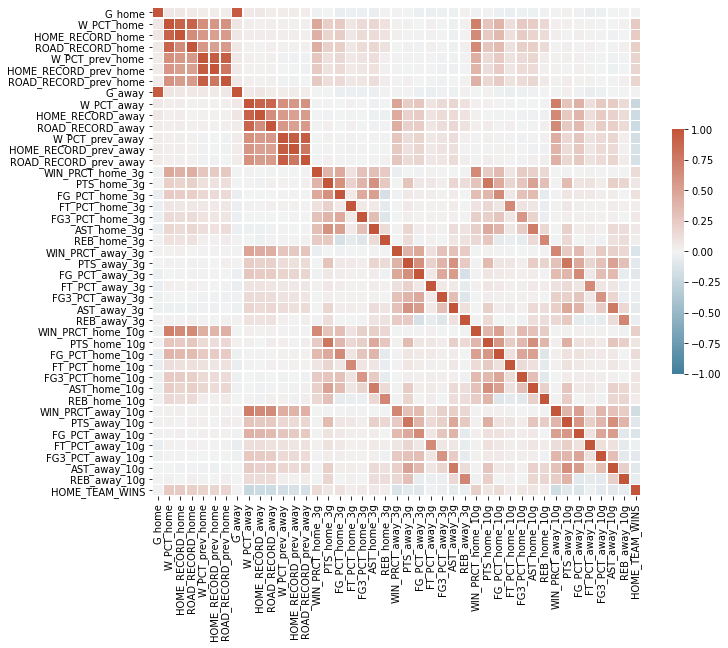

In [444]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1, center=0, vmin=-1, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [506]:
feat_cols = corr[corr[target].sort_values().abs() >= 0.1].index
feat_cols = [c for c in feat_cols if c != target]
feat_cols

['W_PCT_home',
 'HOME_RECORD_home',
 'ROAD_RECORD_home',
 'W_PCT_prev_home',
 'HOME_RECORD_prev_home',
 'ROAD_RECORD_prev_home',
 'W_PCT_away',
 'HOME_RECORD_away',
 'ROAD_RECORD_away',
 'W_PCT_prev_away',
 'HOME_RECORD_prev_away',
 'ROAD_RECORD_prev_away',
 'WIN_PRCT_home_3g',
 'WIN_PRCT_away_3g',
 'WIN_PRCT_home_10g',
 'FG_PCT_home_10g',
 'WIN_PRCT_away_10g',
 'FG_PCT_away_10g']

## Training set : 2007-2018 seasons data

In [493]:
train = games_formated.loc[(games_formated['SEASON'] >= 2007) & (games_formated['SEASON'] <= 2018)]

In [507]:
train.shape

(16632, 45)

In [508]:
train['HOME_TEAM_WINS'].value_counts(normalize=True)

1    0.594156
0    0.405844
Name: HOME_TEAM_WINS, dtype: float64

In [509]:
X_train, y_train = train[feat_cols], train[target]

## Test set : 2019 season (caution with Covid)

In [510]:
test = games_formated.loc[(games_formated['SEASON'] == 2019)]

In [511]:
test.shape

(1241, 45)

In [512]:
test['HOME_TEAM_WINS'].value_counts(normalize=True)

1    0.536664
0    0.463336
Name: HOME_TEAM_WINS, dtype: float64

In [513]:
X_test, y_test = test[feat_cols], test[target]

## Train a first model

In [397]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [471]:
import numpy as np
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope


def map_best_param(best_param, param_space):
    """Maps the parameters set by using hyperopt with
    real value (which can be used to instantiate the model)

    This function is mainly for param set with hp.choice or
    if it's an integer

    Parameters
    ----------
    best_param : dict
        Dictionnary with the best selected value
        for each parameters 
    param_space : dict
        Dictionnary with the proba distribution for
        each parameters

    Returns
    -------
    dict
        Dictionnary with the best parameters in the
        correct format to instanciate the model
    """
    for key, value in param_space.items():
        best_val = best_param[key]
        
        if value.name == 'switch':
            _values = value.pos_args[1:]    
            best_val = _values[best_val].obj
            
        elif value.name == 'int':
            best_val = int(best_val)
        
        best_param[key] = best_val
        
    return best_param


class BayesianSearchCV():
    """Find best parameters from a given param_space using
    Bayesian optimization (package hyperopt)

    For the scoring method : 
    https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

    Parameters
    ----------
    model :
        Model class (not instantiate)
    param_space : dict
        Dictionnary with the proba distribution for
        each parameters
    X_train : array-like 
        Feature to train the model
    y_train : array-like
        Label to train the model
    n_iter : int
        Number of maximum iteration
    cv : int, optional
        Determines the cross-validation splitting strategy, by default 5
    scoring : str, callable, list/tuple or dict, default=None
        A single str or a callable to evaluate the predictions on the test set.
        For evaluating multiple metrics, either give a list of (unique) strings
        or a dict with names as keys and callables as values.
        If None, the estimator's score method is used.
    maximize_score : bool, optional
        Whether you want to maximize the score (e.g. accuracy)
        or to minimize it (e.g. RMSE), by default True

    Returns
    -------
    best_model
        The model fitted with the best hyperparameters
    """
    
    def __init__(self, estimator, param_space, n_iter, cv=5, scoring=None, maximize_score=True, n_jobs=None):
        """
        """
        self.estimator = estimator
        self.param_space = param_space
        self.n_iter = n_iter
        self.cv = cv
        self.scoring = scoring
        self.maximize_score = maximize_score
        self.n_jobs = n_jobs
        
        
    
    def fit(self, X, y):
        """
        X : array-like of shape (n_samples, n_features)
            Training vector, where n_samples is the number of samples and n_features is the number of features.
        y : array-like of shape (n_samples, n_output) or (n_samples,)
        """        
    
        def objective_function(params):
            """Objective function to maximize.

            /!\ if your metric needs to be minimize please 
            /!\ use maximize_score=False

            Parameters
            ----------
            params: dict
                Dictionnary of parameters for
                the model

            Returns
            -------
            dict:
                dictionnary with loss and status
            """
            model = self.estimator(**params)
            score = cross_val_score(model, X, y, cv=self.cv, scoring=self.scoring, n_jobs=self.n_jobs).mean()
            loss = -score if self.maximize_score else score
            
            return {'loss': loss, 'status': STATUS_OK}
        
    
        # Init history
        trials = Trials()
        best_param = fmin(objective_function, 
                          self.param_space, 
                          algo=tpe.suggest, 
                          max_evals=self.n_iter, 
                          trials=trials,
                          rstate= np.random.RandomState(1))


        # Map best parameters
        best_param = map_best_param(best_param, self.param_space)
        if self.n_jobs is not None:
            best_param['n_jobs'] = self.n_jobs
        
        # Fit the best model
        best_estimator = self.estimator(**best_param)
        best_estimator.fit(X, y)
        
        self.best_estimator_ = best_estimator
        self.best_param_ = best_param
        self.best_score_ = cross_val_score(best_estimator, X, y, 
                                           cv=self.cv, 
                                           scoring=self.scoring,
                                           n_jobs=self.n_jobs).mean()
        self.trials_ = trials

In [431]:
import warnings
warnings.filterwarnings('ignore')

test quick train on RF with not a lot of trees.

In [514]:
clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=100, max_depth=7, bootstrap=True)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_jobs=2, random_state=42)

In [515]:
print('Train accuracy:',clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Train accuracy: 0.7002765752765753
Test accuracy: 0.636583400483481


In [516]:
lr = LogisticRegression(random_state=42, penalty='l2')
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [517]:
print('Train accuracy:',lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))

Train accuracy: 0.6690115440115441
Test accuracy: 0.6430298146655923


### Bayesian opitmisation

In [469]:
# help function : http://hyperopt.github.io/hyperopt/getting-started/search_spaces/
param_hyperopt = {
    'bootstrap': hp.choice('bootstrap', [True, False]),
    'max_depth': scope.int(hp.quniform('max_depth', 2, 10, 1)),
    'max_features': hp.choice('max_features', ['auto', 'sqrt']),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 4, 1)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 10, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 100, 2000, 1))
}

n_iter =  50
clf = RandomForestClassifier

# bayes_search = BayesianSearchCV(clf, param_hyperopt, n_iter, cv=5, scoring='accuracy', maximize_score=True, n_jobs=2)
# bayes_search.fit(X_train, y_train)

# bayes_search.best_estimator_

In [ ]:
bayes_search.best_estimator_.score(X_test, y_test)

In [518]:
# help function : http://hyperopt.github.io/hyperopt/getting-started/search_spaces/
param_hyperopt = {
    'C': scope.int(hp.quniform('C', 1, 10, 1)),
    'penalty': hp.choice('penalty', ['l1','l2','elasticnet']),
    'solver' :hp.choice('solver', ['newton-cg','lbfgs','liblinear','sag','saga']),
}

n_iter =  50
lr = LogisticRegression

bayes_search = BayesianSearchCV(lr, param_hyperopt, n_iter, cv=5, scoring='accuracy', maximize_score=True, n_jobs=2)
bayes_search.fit(X_train, y_train)

bayes_search.best_estimator_

100%|██████████| 50/50 [00:48<00:00,  1.04trial/s, best loss: -0.6681097874295496]


LogisticRegression(C=8, n_jobs=2, penalty='l1', solver='liblinear')

0.6398066075745367


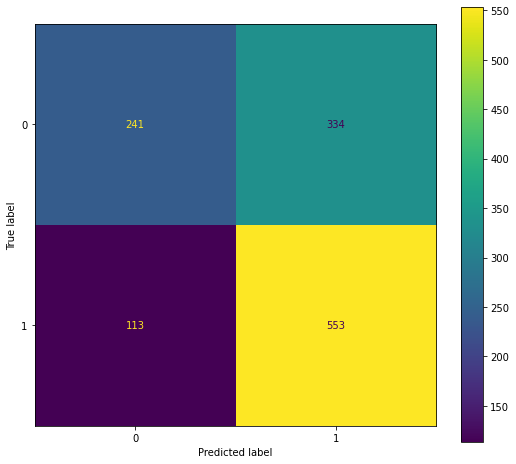

In [522]:
from sklearn.metrics import plot_confusion_matrix

print(bayes_search.best_estimator_.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(9,8))
plot_confusion_matrix(bayes_search.best_estimator_, X_test, y_test, ax=ax)  
plt.show()

In [450]:
# %%time
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform

# param_random= {
#     'bootstrap': [True, False],
#     'max_depth': list(range(2, 10)),
#     'max_features': ['auto', 'sqrt'],
#     'min_samples_leaf': list(range(1, 4)),
#     'min_samples_split': list(range(2, 10)),
#     'n_estimators': list(range(100, 500))
# }

# clf = RandomForestClassifier()

# clf = RandomizedSearchCV(clf, param_random, n_iter=1, random_state=42, n_jobs=2, cv=5)

# search = clf.fit(X_train, y_train)

# search.best_params_
# search.best_estimator_.score(X_test, y_test)